# Author: Ajeng Septiani Dewi

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# Import Libraries

In [1]:
# Import all libraries required in this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preparation and Cleaning

In [3]:
# Data reading, checking dimensions and information of the data

print(data)
print('dimensions:')
print(data.shape)
print('Information:')
data.info()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
dimensions:
(25, 2)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Cheking for duplicates

value=len(data[data.duplicated()])
print(value)

0


There are no missing values or duplicates in the data.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


Data summary shows mean hours studied is 5.012 and mean score is 51.480.

# Data Visualization

<ipython-input-6-6f0187e4a79f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Scores'])


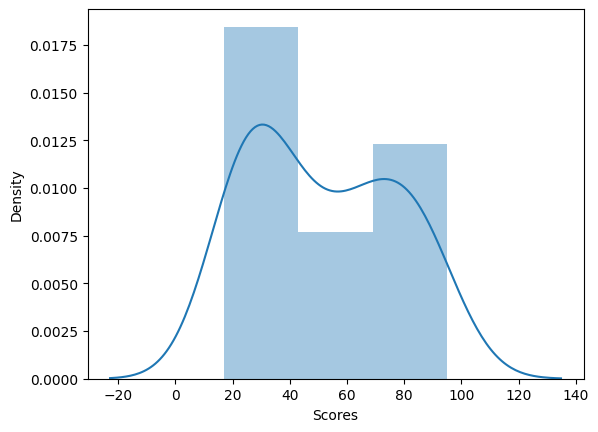

In [6]:
# Distribution
sns.distplot(data['Scores'])
plt.show()

The distribution plot indicates a normal distribution of scores.

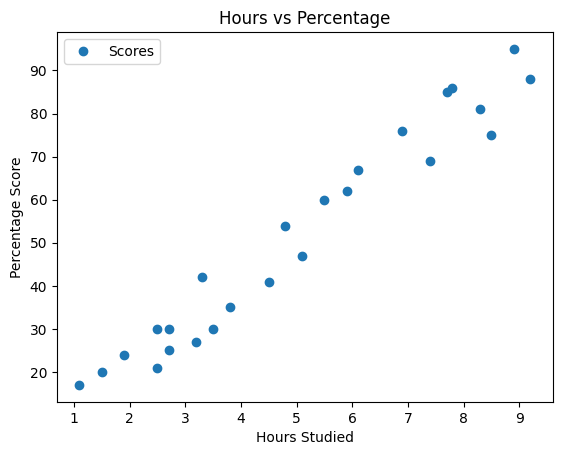

In [7]:
# Scatterplot

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

We can see that the scatter plot show a linear association between the Scores and the Number of Hours studied. It demonstrates a positive relationship between the two variables, with an increase in the Study hours resulting in an increase in the Marks scored.

# Data Pre processing

In [8]:
# Data preprocessing

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Model Training

In [9]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [10]:
# Training the algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


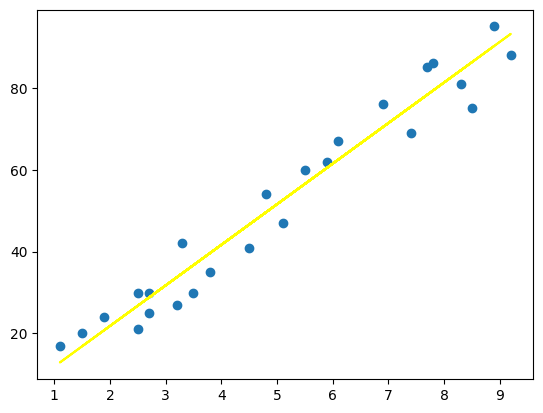

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color="yellow");
plt.show()

# Making Prediction

In [12]:
# Testing data

print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print("Accuracy:",regressor.score(X,y)*100)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
Accuracy: 95.26947647057273


In [14]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


In [17]:
hours=9.25
p=regressor.predict([[hours]])
print(f"If a student studied for {hours} hours/day will score {p} % in exam.")

If a student studied for 9.25 hours/day will score [93.69173249] % in exam.


# Model Evaluation

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))


Mean Absolute Error: 4.183859899002982
R2 score: 0.9454906892105354


This model can accurately predict student scores based on the number of study hours. For example, a student studying 8 hours/day is predicted to score approximately 81.30% in the exam. A successful model for predicting student scores based on study hours, with a high accuracy of 95.27%.